# Inner core nucleation paradox

We would like to know how the critical radius for homogenous nucleation in liquid iron (and a range of other materials) changes as a function of a variety of thermodynamic parameters.

Using classical nucleation theory, we can express this critical radius, $r_{\rm c}$, as a function of temperature, for example with:

$r_{\rm c}\left(T\right) = \frac{2\gamma M T_{\rm m}}{L\rho\left(T_{\rm m}-T \right)}$

### Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting
from matplotlib import cm
from matplotlib import rc
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

---

## Example: freezing of liquid water

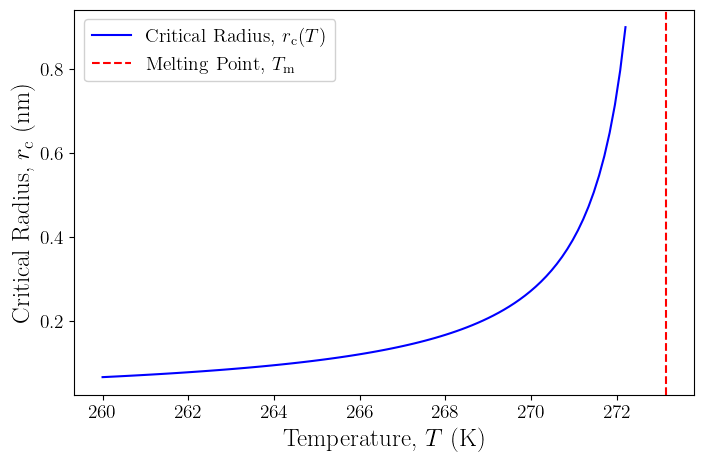

In [32]:
T_m = 273.15  # K (melting temperature of water)
gamma = 0.029  # J/m^2 (surface tension between ice and water)
L = 334e3  # J/kg (latent heat of fusion for water)
V_m = 1.96e-5  # m^3/mol (molar volume of ice)
M = 18.015e-3  # kg/mol (molar mass of water)
rho = 1000  # kg/m^3 (density of water)

T = np.linspace(260, 272.2, 100)  # K

delta_T = T_m - T
r_c = (2 * gamma * M * T_m) / (L * rho * delta_T)

plt.figure(figsize = (8, 5))
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.plot(T, r_c * 1e9, label = r'Critical Radius, $r_{\rm c}(T)$', color = 'b') 
plt.axvline(T_m, linestyle = '--', color = 'r', label = r'Melting Point, $T_{\rm m}$')

plt.xlabel('Temperature, $T$ (K)', fontsize = 18)
plt.ylabel(r'Critical Radius, $r_{\rm c}$ (nm)', fontsize = 18)
plt.gca().tick_params(axis = 'both', colors = 'k', labelsize = 14)
plt.legend(fontsize = 14, framealpha = 0.9)
plt.show()

At lower temperatures (i.e., a higher degree of undercooling), smaller nuclei can become stable and grow. Stable nuclei start to grow when their radius exceeds $r_{\rm c}$, meaning that the Gibbs free energy decreases with further growth. For example, if we assume that a nucleus has to be ~1nm to be stable, then we much cool water by ~1 K under the melting point for such nuclei to grow.

In [28]:
T_nucleation = T_m - (2 * gamma * V_m * T_m) / (L * 1e-9)
print(f"Degree of undercooling: {T_m - T_nucleation:.2f} K")

Degree of undercooling: 0.93 K


Reframe the plot as a function of undercooling, not just absolute temperature.

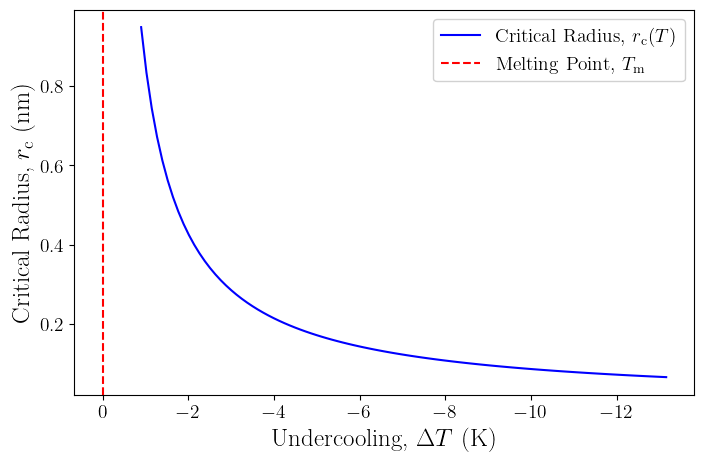

In [ ]:
T_m = 273.15  # K (melting temperature of water)
gamma = 0.029  # J/m^2 (surface tension between ice and water)
L = 334e3  # J/kg (latent heat of fusion for water)
V_m = 1.96e-5  # m^3/mol (molar volume of ice)
M = 18.01528e-3  # kg/mol (molar mass of water)
rho = 1000  # kg/m^3 (density of water)

T = np.linspace(260, 272.25, 100)  # K

delta_T = T - T_m
r_c = (2 * gamma * T_m * M) / (L * rho * abs(delta_T))

plt.figure(figsize = (8, 5))
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.plot(delta_T, r_c * 1e9, label = r'Critical Radius, $r_{\rm c}(T)$', color = 'b') 
plt.gca().invert_xaxis()  
plt.axvline(T_m - T_m, linestyle = '--', color = 'r', label = r'Melting Point, $T_{\rm m}$')

plt.xlabel(r'Undercooling, $\Delta T$ (K)', fontsize = 18)
plt.ylabel(r'Critical Radius, $r_{\rm c}$ (nm)', fontsize = 18)
plt.gca().tick_params(axis = 'both', colors = 'k', labelsize = 14)
plt.legend(fontsize = 14, framealpha = 0.9)
plt.show()

---

## Liquid Fe @ inner core conditions

Repeat the above but for liquid iron at inner core conditions with the aim of reproducing plots from Sun et al. (2021) using theory.

### Parameters & constants

In [2]:
M = 55.845e-3  # kg/mol (molar mass of iron)
N_A = 6.022e23  # mol^-1 (Avogadro's number)
k_B = 1.380649e-23  # J/K (Boltzmann constant)

rho_L = 13000  # kg/m^3 (density of liquid iron at inner core boundary)
T_m = 6370  # K (melting temperature of iron - Alfe, 2009)
gamma = 0.2  # J/m^2 (surface tension between solid and liquid iron – Liu et al., 2013: Molecular dynamics calculation of solid–liquid interfacial free energy and its anisotropy during iron solidification)
L = 13.8e3  # J/mol (latent heat of fusion for iron)
n = (rho_L * N_A) / M # atoms/m^3 (i.e., rho / mass of 1 atom (M / N_A))

s = (36 * np.pi)**(1/3) # (shape factor for spherical particles)
f = 7.6e14 # s^-1 (attachment rate for Ni – Sun et al., 2018: Overcoming the Time Limitation in Molecular Dynamics Simulation of Crystal Nucleation)

#### $r_{\rm c}$

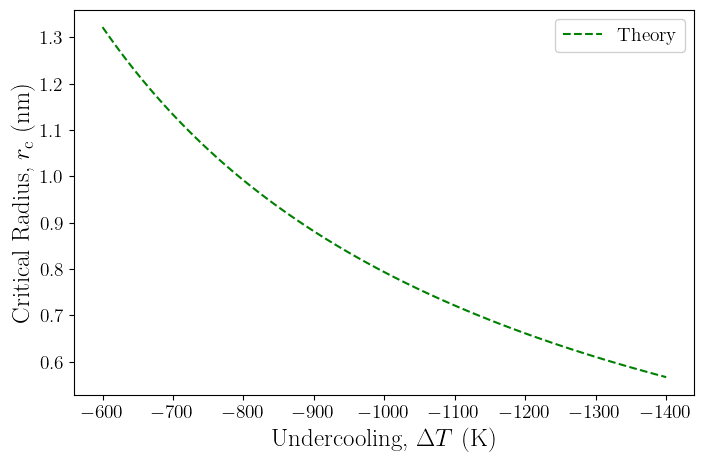

In [ ]:
delta_T = np.linspace(600, 1400, 100)
delta_mu = (L * delta_T * rho_L) / (T_m * M * n) 
r_c = (2 * gamma) / (delta_mu * n)

plt.figure(figsize = (8, 5))
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.plot(delta_T*-1, r_c * 1e9, label = r'Theory', color = 'g', linestyle = '--') 
plt.gca().invert_xaxis()  

plt.xlabel(r'Undercooling, $\Delta T$ (K)', fontsize = 18)
plt.ylabel(r'Critical Radius, $r_{\rm c}$ (nm)', fontsize = 18)
plt.gca().tick_params(axis = 'both', colors = 'k', labelsize = 14)
plt.legend(fontsize = 14, framealpha = 0.9)
plt.show()

---

#### $\Delta G^*$

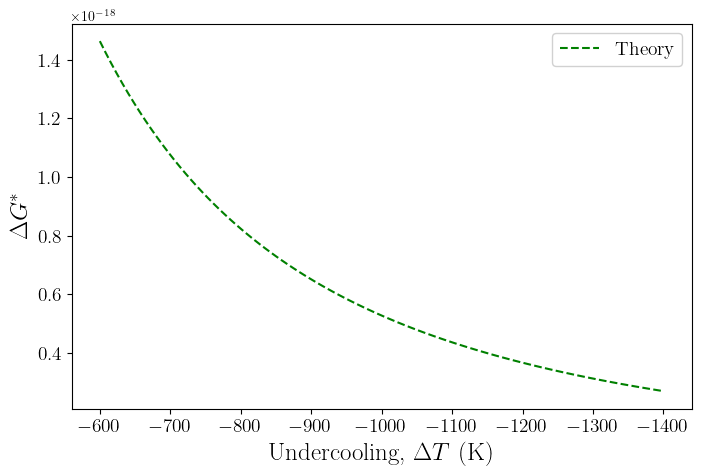

In [77]:
delta_T = np.linspace(600, 1400, 100)
delta_mu = (L * delta_T * rho_L) / (T_m * M * n)
delta_G_star = (16 * np.pi * gamma**3) / (3 * (n * delta_mu)**2)

plt.figure(figsize = (8, 5))
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.plot(delta_T*-1, delta_G_star, label = r'Theory', color = 'g', linestyle = '--') 
plt.gca().invert_xaxis()  

plt.xlabel(r'Undercooling, $\Delta T$ (K)', fontsize = 18)
plt.ylabel(r'$\Delta G^*$', fontsize = 18)
plt.gca().tick_params(axis = 'both', colors = 'k', labelsize = 14)
plt.legend(fontsize = 14, framealpha = 0.9)
plt.show()

Repeat the above but using the expression given in Sun et al. (2021).

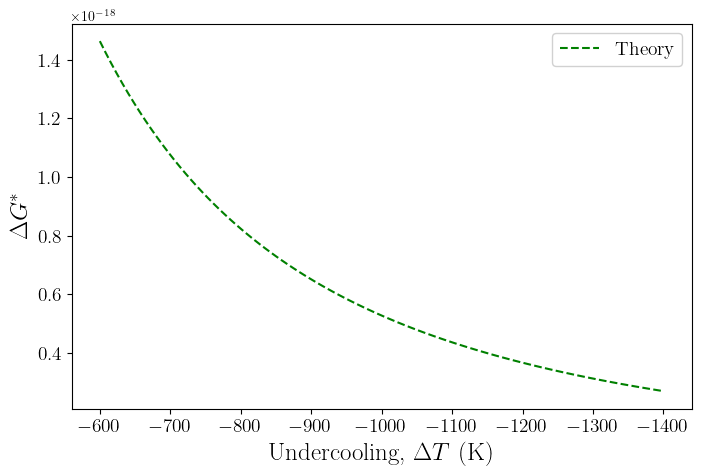

In [78]:
delta_T = np.linspace(600, 1400, 100)
delta_mu = (L * delta_T * rho_L) / (T_m * M * n) 
delta_G_star = (4 * s**3 * gamma**3) / (27 * delta_mu**2 * n**2)

plt.figure(figsize = (8, 5))
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.plot(delta_T*-1, delta_G_star, label = r'Theory', color = 'g', linestyle = '--') 
plt.gca().invert_xaxis()  

plt.xlabel(r'Undercooling, $\Delta T$ (K)', fontsize = 18)
plt.ylabel(r'$\Delta G^*$', fontsize = 18)
plt.gca().tick_params(axis = 'both', colors = 'k', labelsize = 14)
plt.legend(fontsize = 14, framealpha = 0.9)
plt.show()

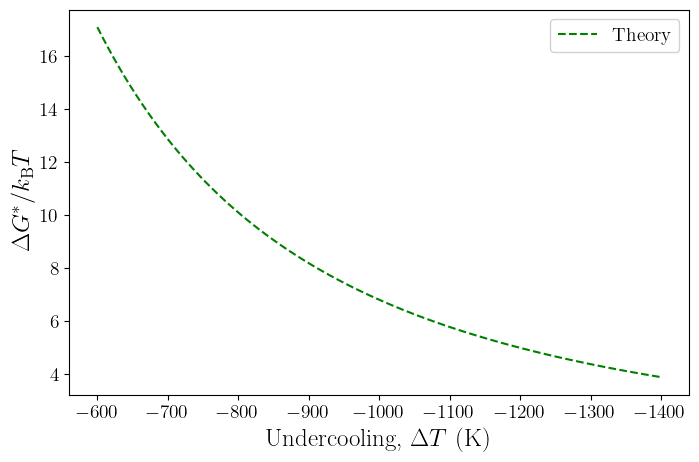

In [79]:
delta_T = np.linspace(600, 1400, 100)
delta_mu = (L * delta_T * rho_L) / (T_m * M)  # J/mol
delta_G_star = ((16 * np.pi * gamma**3) / (3 * L**2)) * ((M * T_m) / (rho_L * abs(delta_T)))**2

plt.figure(figsize = (8, 5))
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.plot(delta_T*-1, delta_G_star/(k_B * T), label = r'Theory', color = 'g', linestyle = '--') 
plt.gca().invert_xaxis()  

plt.xlabel(r'Undercooling, $\Delta T$ (K)', fontsize = 18)
plt.ylabel(r'$\Delta G^*/k_{\rm B}T$', fontsize = 18)
plt.gca().tick_params(axis = 'both', colors = 'k', labelsize = 14)
plt.legend(fontsize = 14, framealpha = 0.9)
plt.show()

---

#### $N^*$

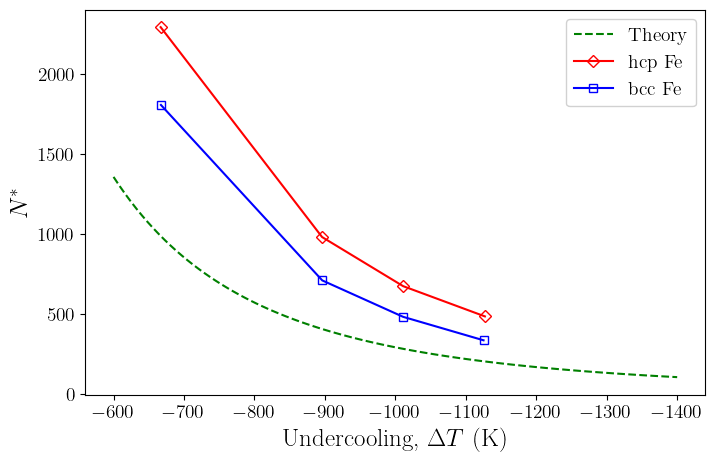

In [80]:
bcc = np.loadtxt('Sun+22_Fig2b_bcc.txt', skiprows = 1)
hcp = np.loadtxt('Sun+22_Fig2b_hcp.txt', skiprows = 1)

delta_T = np.linspace(600, 1400, 100)
delta_mu = (L * delta_T * rho_L) / (T_m * M * n)
delta_G_star = (16 * np.pi * gamma**3) / (3 * (n * delta_mu)**2)
N_star = 2 * delta_G_star / delta_mu

plt.figure(figsize = (8, 5))
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.plot(delta_T*-1, N_star, label = r'Theory', color = 'g', linestyle = '--') 
plt.plot(hcp[:,0], hcp[:,1], label = r'hcp Fe', color = 'r', linestyle = '-', marker = 'D', markerfacecolor = 'none') 
plt.plot(bcc[:,0], bcc[:,1], label = r'bcc Fe', color = 'b', linestyle = '-', marker = 's', markerfacecolor = 'none') 
plt.gca().invert_xaxis()  

plt.xlabel(r'Undercooling, $\Delta T$ (K)', fontsize = 18)
plt.ylabel(r'$N^*$', fontsize = 18)
plt.gca().tick_params(axis = 'both', colors = 'k', labelsize = 14)
plt.legend(fontsize = 14, framealpha = 0.9)
plt.show()

Repeat the above but using the expression from Sun et al. (2021).

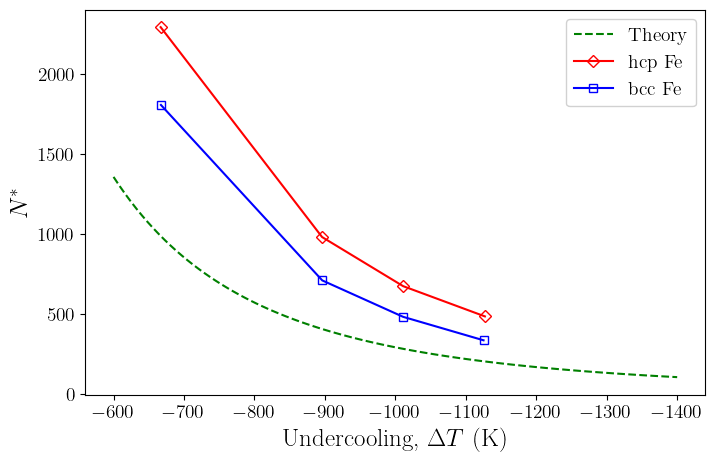

In [81]:
bcc = np.loadtxt('Sun+22_Fig2b_bcc.txt', skiprows = 1)
hcp = np.loadtxt('Sun+22_Fig2b_hcp.txt', skiprows = 1)

delta_T = np.linspace(600, 1400, 100)
delta_mu = (L * delta_T * rho_L) / (T_m * M * n) 
N_star = (8 * s**3 * gamma**3) / (27 * delta_mu**3 * n**2)

plt.figure(figsize = (8, 5))
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.plot(delta_T*-1, N_star, label = r'Theory', color = 'g', linestyle = '--') 
plt.plot(hcp[:,0], hcp[:,1], label = r'hcp Fe', color = 'r', linestyle = '-', marker = 'D', markerfacecolor = 'none') 
plt.plot(bcc[:,0], bcc[:,1], label = r'bcc Fe', color = 'b', linestyle = '-', marker = 's', markerfacecolor = 'none') 
plt.gca().invert_xaxis()  

plt.xlabel(r'Undercooling, $\Delta T$ (K)', fontsize = 18)
plt.ylabel(r'$N^*$', fontsize = 18)
plt.gca().tick_params(axis = 'both', colors = 'k', labelsize = 14)
plt.legend(fontsize = 14, framealpha = 0.9)
plt.show()

---

#### $J$

How does $J$ vary as a function of density, degree of undercooling, melting temperature, gamma, latent heat, and $f^+$?

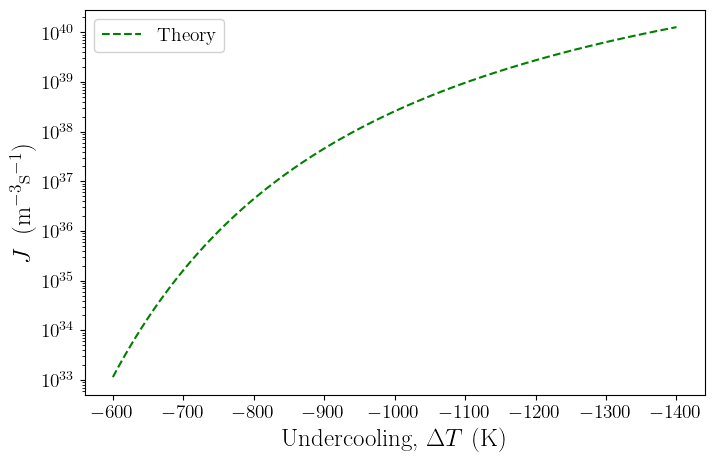

In [82]:
delta_T = np.linspace(600, 1400, 100)
T = T_m - delta_T
delta_mu = (L * delta_T * rho_L) / (T_m * M * n)
delta_G_star = (16 * np.pi * gamma**3) / (3 * (n * delta_mu)**2)
N_star = 2 * delta_G_star / delta_mu

J = n * f * np.sqrt(delta_mu / (6 * np.pi * k_B * T * N_star)) * np.exp(-(delta_mu * N_star) / (2 * k_B * T))

plt.figure(figsize = (8, 5))
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.plot(delta_T*-1, J, label = r'Theory', color = 'g', linestyle = '--') 
plt.gca().invert_xaxis()  
plt.gca().set_yscale('log')

plt.xlabel(r'Undercooling, $\Delta T$ (K)', fontsize = 18)
plt.ylabel(r'$J$ \;(m$^{-3}$s$^{-1})$', fontsize = 18)
plt.gca().tick_params(axis = 'both', colors = 'k', labelsize = 14)
plt.legend(fontsize = 14, framealpha = 0.9)
plt.show()

Why doesn't $J$ cover the range seen in Sun et al. (2022)?

---

#### $\tau$

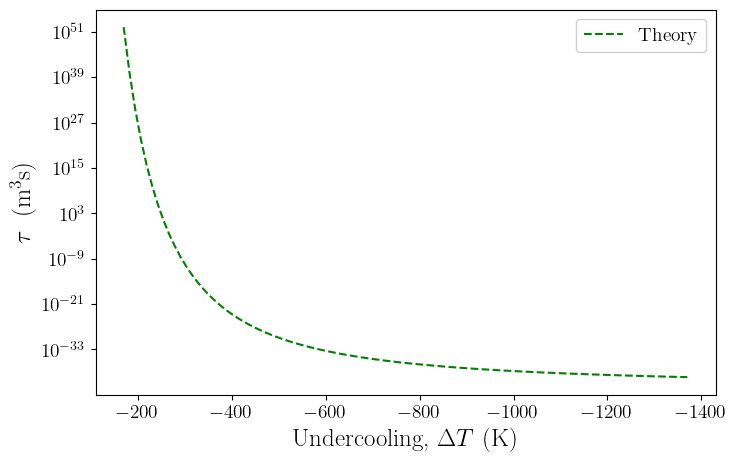

In [ ]:
delta_T = np.linspace(170, 1370, 100)
T = T_m - delta_T
delta_mu = (L * delta_T * rho_L) / (T_m * M * n)
delta_G_star = (16 * np.pi * gamma**3) / (3 * (n * delta_mu)**2)
N_star = 2 * delta_G_star / delta_mu

J = n * f * np.sqrt(delta_mu / (6 * np.pi * k_B * T * N_star)) * np.exp(-(delta_mu * N_star) / (2 * k_B * T))

plt.figure(figsize = (8, 5))
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.plot(delta_T*-1, 1/(2*J), label = r'Theory', color = 'g', linestyle = '--') 
plt.gca().invert_xaxis()  
plt.gca().set_yscale('log')

plt.xlabel(r'Undercooling, $\Delta T$ (K)', fontsize = 18)
plt.ylabel(r'$\tau$ \;(m$^{3}$s$)$', fontsize = 18)
plt.gca().tick_params(axis = 'both', colors = 'k', labelsize = 14)
plt.legend(fontsize = 14, framealpha = 0.9)
plt.show()

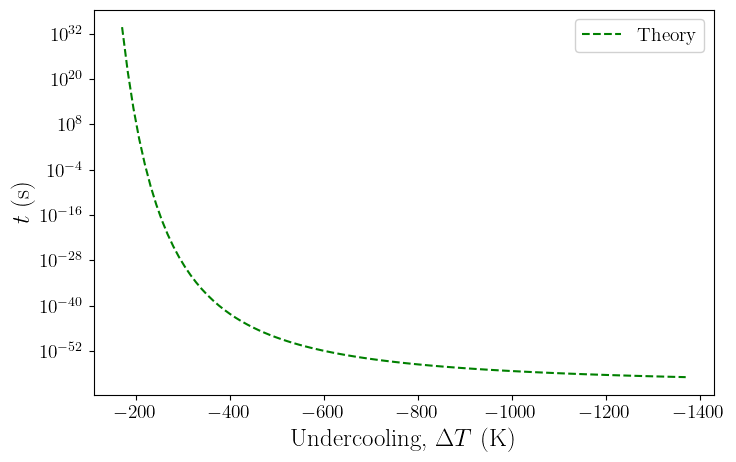

In [85]:
delta_T = np.linspace(170, 1370, 100)
T = T_m - delta_T
delta_mu = (L * abs(delta_T) * rho_L) / (T_m * M * n)
delta_G_star = (16 * np.pi * gamma**3) / (3 * (n * delta_mu)**2)
N_star = 2 * delta_G_star / delta_mu

J = n * f * np.sqrt(delta_mu / (6 * np.pi * k_B * T * N_star)) * np.exp(-(delta_mu * N_star) / (2 * k_B * T))
t = 3 / (4 * np.pi * (1220e3)**3 * J) 

plt.figure(figsize = (8, 5))
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.plot(delta_T*-1, t, label = r'Theory', color = 'g', linestyle = '--') 
plt.gca().invert_xaxis()  
plt.gca().set_yscale('log')

plt.xlabel(r'Undercooling, $\Delta T$ (K)', fontsize = 18)
plt.ylabel(r'$t$ (s)', fontsize = 18)
plt.gca().tick_params(axis = 'both', colors = 'k', labelsize = 14)
plt.legend(fontsize = 14, framealpha = 0.9)
plt.show()

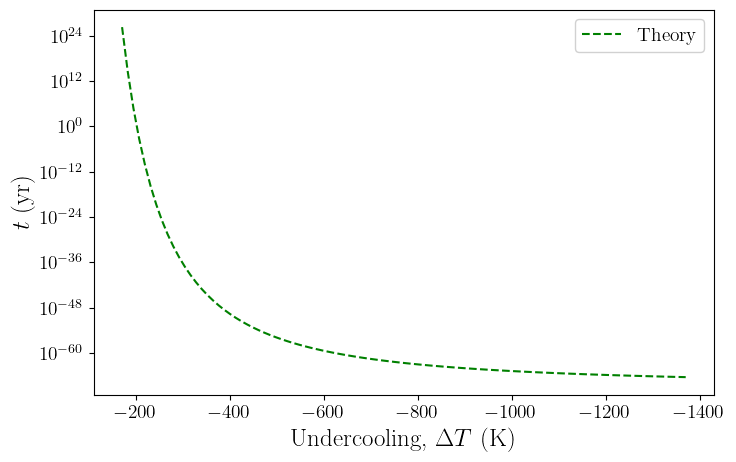

In [86]:
delta_T = np.linspace(170, 1370, 100)
T = T_m - delta_T
delta_mu = (L * delta_T * rho_L) / (T_m * M * n)
delta_G_star = (16 * np.pi * gamma**3) / (3 * (n * delta_mu)**2)
N_star = 2 * delta_G_star / delta_mu

J = n * f * np.sqrt(delta_mu / (6 * np.pi * k_B * T * N_star)) * np.exp(-(delta_mu * N_star) / (2 * k_B * T))
t = 3 / (4 * np.pi * (1220e3)**3 * J) 

plt.figure(figsize = (8, 5))
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.plot(delta_T*-1, t/3.16e7, label = r'Theory', color = 'g', linestyle = '--') 
plt.gca().invert_xaxis()  
plt.gca().set_yscale('log')

plt.xlabel(r'Undercooling, $\Delta T$ (K)', fontsize = 18)
plt.ylabel(r'$t$ (yr)', fontsize = 18)
plt.gca().tick_params(axis = 'both', colors = 'k', labelsize = 14)
plt.legend(fontsize = 14, framealpha = 0.9)
plt.show()

---

### Sensitivity test

Next, we would like to know how strongly each of the input parameters varies the nucleation time.

In [229]:
M = 55.845e-3  # kg/mol (molar mass of iron)
N_A = 6.022e23  # mol^-1 (Avogadro's number)
k_B = 1.380649e-23  # J/K (Boltzmann constant)

rho_L = 13000  # kg/m^3 (density of liquid iron at inner core boundary)
T_m = 6370  # K (melting temperature of iron - Alfe, 2009)
gamma = 0.2  # J/m^2 (surface tension between solid and liquid iron – Liu et al., 2013: Molecular dynamics calculation of solid–liquid interfacial free energy and its anisotropy during iron solidification)
L = 13.8e3  # J/mol (latent heat of fusion for iron)
n = (rho_L * N_A) / M # atoms/m^3 (i.e., rho / mass of 1 atom (M / N_A))

s = (36 * np.pi)**(1/3) # (shape factor for spherical particles)
f = 7.6e14 # s^-1 (attachment rate for Ni – Sun et al., 2018: Overcoming the Time Limitation in Molecular Dynamics Simulation of Crystal Nucleation)

#### $\rho_L$

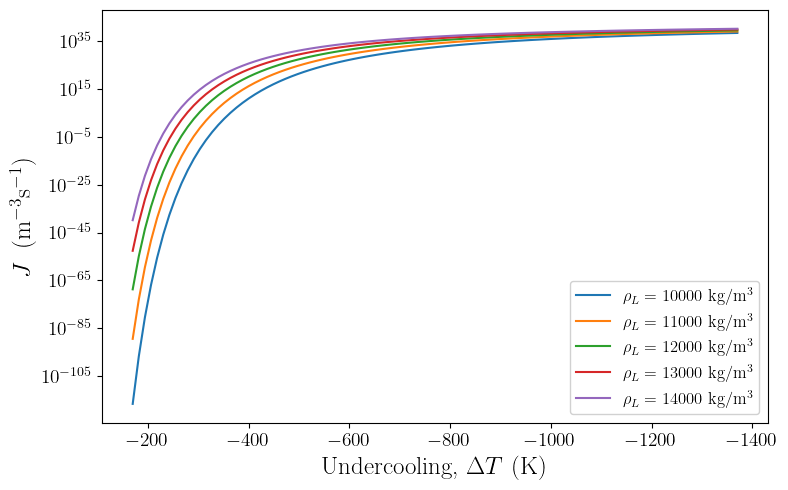

In [87]:
delta_T = np.linspace(170, 1370, 100)
T = T_m - delta_T

# Variable:
rho_L_values = np.arange(10000, 15000, 1000)  

plt.figure(figsize = (8, 5))
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

for rho_L in rho_L_values:
    n = (rho_L * N_A) / M  
    delta_mu = (L * delta_T * rho_L) / (T_m * M * n)
    delta_G_star = (16 * np.pi * gamma**3) / (3 * (n * delta_mu)**2)
    N_star = 2 * delta_G_star / delta_mu

    J = n * f * np.sqrt(delta_mu / (6 * np.pi * k_B * T * N_star)) * np.exp(-(delta_mu * N_star) / (2 * k_B * T))

    plt.plot(-delta_T, J, label = fr'$\rho_L = {rho_L}\ \mathrm{{kg/m^3}}$')

plt.gca().invert_xaxis()
plt.gca().set_yscale('log')

plt.xlabel(r'Undercooling, $\Delta T$ (K)', fontsize = 18)
plt.ylabel(r'$J$ \;(m$^{-3}$s$^{-1})$', fontsize = 18)
plt.tick_params(axis = 'both', labelsize = 14)
plt.legend(fontsize = 12, framealpha = 0.9)
plt.tight_layout()
plt.show()

/var/folders/kj/59sk5mrx6214shnd0_nt_2z80000gq/T/ipykernel_15052/2804006145.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


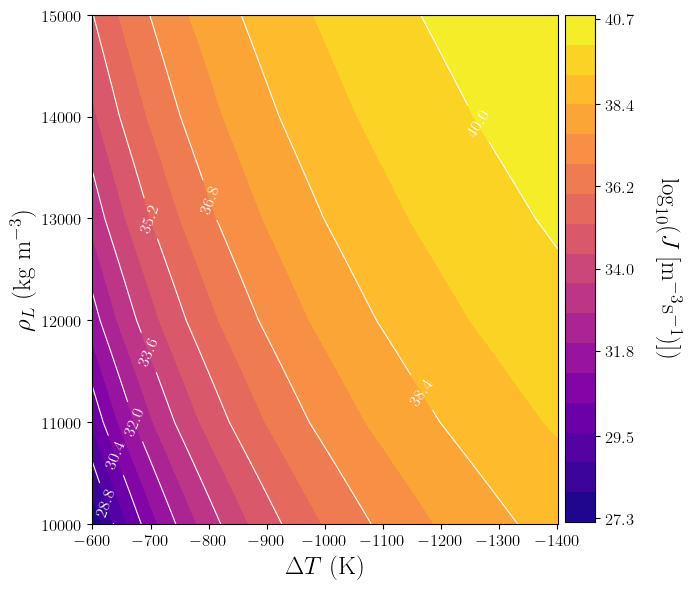

In [289]:
delta_T = np.linspace(600, 1401, 100)
rho_L_values = np.arange(10000, 15001, 1000)  
Delta_T, Rho_L = np.meshgrid(delta_T, rho_L_values)
T = T_m - Delta_T

n = (Rho_L * N_A) / M
delta_mu = (L * Delta_T * Rho_L) / (T_m * M * n)
delta_G_star = (16 * np.pi * gamma**3) / (3 * (n * delta_mu)**2)
N_star = 2 * delta_G_star / delta_mu

J = n * f * np.sqrt(delta_mu / (6 * np.pi * k_B * T * N_star)) * np.exp(-(delta_mu * N_star) / (2 * k_B * T))
log_J = np.log10(J)

# -------------------------------
plt.figure(figsize = (6, 6))
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

ax = plt.gca()
contour = ax.contourf(-Delta_T, Rho_L, log_J, levels = 20, cmap = 'plasma')
levels = contour.levels
highlight_levels = levels[::2]
contour_lines = ax.contour(-Delta_T, Rho_L, log_J, levels = highlight_levels, colors = 'white', linewidths = 0.8)
ax.clabel(contour_lines, fmt = '%.1f', colors = 'white', fontsize = 12)

ax.invert_xaxis()
ax.set_xlabel(r'$\Delta T$ (K)', fontsize = 18)
ax.set_ylabel(r'$\rho_L$ (kg m$^{-3}$)', fontsize = 18)
ax.tick_params(axis = 'both', labelsize = 12)

divider = make_axes_locatable(ax)
cax = plt.axes([0.95, 0.12, 0.05, 0.845])
cbar = plt.colorbar(contour, cax = cax, orientation = 'vertical')
cbar.set_label(r'$\log_{10}(J \; [$m$^{-3}$s$^{-1})$])', fontsize = 18, labelpad = 35, rotation = -90)
cbar.ax.tick_params(labelsize = 12, direction = 'out')
cbar.ax.yaxis.set_offset_position('left') 
cbar.ax.yaxis.offsetText.set_fontsize(18)
tick_values = np.linspace(np.nanmin(log_J), np.nanmax(log_J), 7)
cbar.set_ticks(np.round(tick_values, 1))
cbar.update_ticks()

plt.tight_layout()
plt.show()

/var/folders/kj/59sk5mrx6214shnd0_nt_2z80000gq/T/ipykernel_15052/3038642073.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


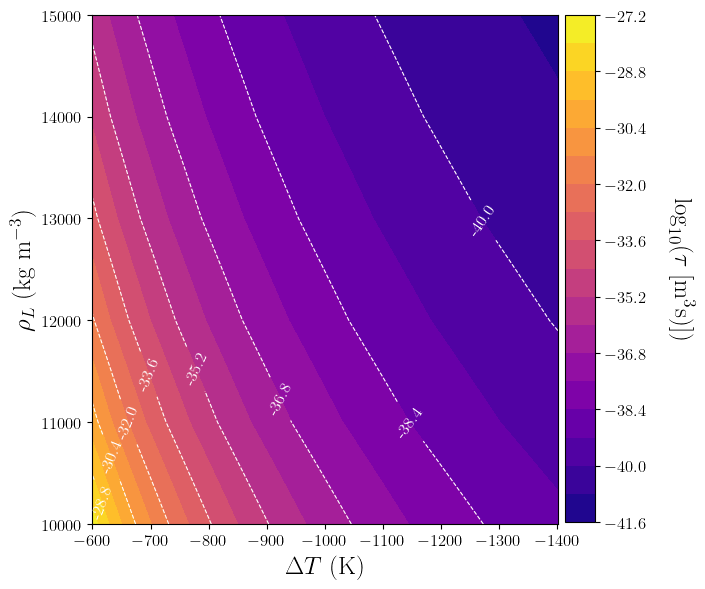

In [303]:
delta_T = np.linspace(600, 1401, 100)
rho_L_values = np.arange(10000, 15001, 1000)  
Delta_T, Rho_L = np.meshgrid(delta_T, rho_L_values)
T = T_m - Delta_T

n = (Rho_L * N_A) / M
delta_mu = (L * Delta_T * Rho_L) / (T_m * M * n)
delta_G_star = (16 * np.pi * gamma**3) / (3 * (n * delta_mu)**2)
N_star = 2 * delta_G_star / delta_mu

J = n * f * np.sqrt(delta_mu / (6 * np.pi * k_B * T * N_star)) * np.exp(-(delta_mu * N_star) / (2 * k_B * T))
log_tau = np.log10(1/(2*J))

# -------------------------------
plt.figure(figsize = (6, 6))
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

ax = plt.gca()
contour = ax.contourf(-Delta_T, Rho_L, log_tau, levels = 20, cmap = 'plasma')
levels = contour.levels
highlight_levels = levels[::2]
contour_lines = ax.contour(-Delta_T, Rho_L, log_tau, levels = highlight_levels, colors = 'white', linewidths = 0.8)
ax.clabel(contour_lines, fmt = '%.1f', colors = 'white', fontsize = 12)

ax.invert_xaxis()
ax.set_xlabel(r'$\Delta T$ (K)', fontsize = 18)
ax.set_ylabel(r'$\rho_L$ (kg m$^{-3}$)', fontsize = 18)
ax.tick_params(axis = 'both', labelsize = 12)

divider = make_axes_locatable(ax)
cax = plt.axes([0.95, 0.12, 0.05, 0.845])
cbar = plt.colorbar(contour, cax = cax, orientation = 'vertical')
cbar.set_label(r'$\log_{10}(\tau \; [$m$^{3}$s)])', fontsize = 18, labelpad = 35, rotation = -90)
cbar.ax.tick_params(labelsize = 12, direction = 'out')
cbar.ax.yaxis.set_offset_position('left') 
cbar.ax.yaxis.offsetText.set_fontsize(18)
# tick_values = np.linspace(np.nanmin(log_J), np.nanmax(log_J), 7)
# cbar.set_ticks(np.round(tick_values, 1))
cbar.update_ticks()

plt.tight_layout()
plt.show()

/var/folders/kj/59sk5mrx6214shnd0_nt_2z80000gq/T/ipykernel_15052/774234939.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


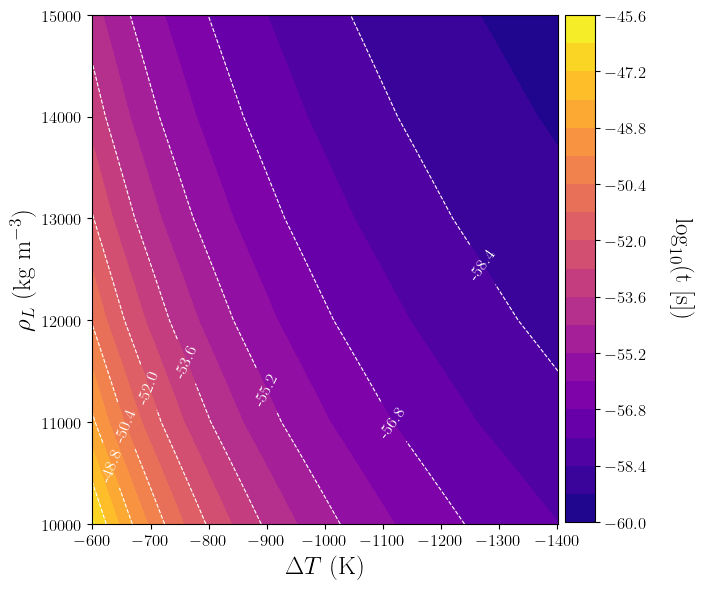

In [309]:
delta_T = np.linspace(600, 1401, 100)
rho_L_values = np.arange(10000, 15001, 1000)  
Delta_T, Rho_L = np.meshgrid(delta_T, rho_L_values)
T = T_m - Delta_T

n = (Rho_L * N_A) / M
delta_mu = (L * Delta_T * Rho_L) / (T_m * M * n)
delta_G_star = (16 * np.pi * gamma**3) / (3 * (n * delta_mu)**2)
N_star = 2 * delta_G_star / delta_mu

J = n * f * np.sqrt(delta_mu / (6 * np.pi * k_B * T * N_star)) * np.exp(-(delta_mu * N_star) / (2 * k_B * T))
log_t = np.log10(3 / (4 * np.pi * (1220e3)**3 * J)) 

# -------------------------------
plt.figure(figsize = (6, 6))
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

ax = plt.gca()
contour = ax.contourf(-Delta_T, Rho_L, log_t, levels = 20, cmap = 'plasma')
levels = contour.levels
highlight_levels = levels[::2]
contour_lines = ax.contour(-Delta_T, Rho_L, log_t, levels = highlight_levels, colors = 'white', linewidths = 0.8)
ax.clabel(contour_lines, fmt = '%.1f', colors = 'white', fontsize = 12)

ax.invert_xaxis()
ax.set_xlabel(r'$\Delta T$ (K)', fontsize = 18)
ax.set_ylabel(r'$\rho_L$ (kg m$^{-3}$)', fontsize = 18)
ax.tick_params(axis = 'both', labelsize = 12)

divider = make_axes_locatable(ax)
cax = plt.axes([0.95, 0.12, 0.05, 0.845])
cbar = plt.colorbar(contour, cax = cax, orientation = 'vertical')
cbar.set_label(r'$\log_{10}$(t [s])', fontsize = 18, labelpad = 35, rotation = -90)
cbar.ax.tick_params(labelsize = 12, direction = 'out')
cbar.ax.yaxis.set_offset_position('left') 
cbar.ax.yaxis.offsetText.set_fontsize(18)
# tick_values = np.linspace(np.nanmin(log_J), np.nanmax(log_J), 7)
# cbar.set_ticks(np.round(tick_values, 1))
cbar.update_ticks()

plt.tight_layout()
plt.show()

/var/folders/kj/59sk5mrx6214shnd0_nt_2z80000gq/T/ipykernel_15052/1609607126.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


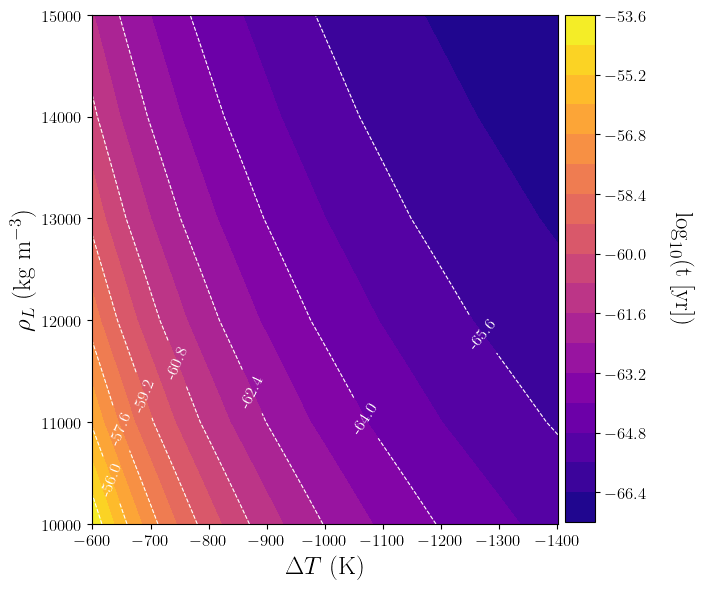

In [ ]:
delta_T = np.linspace(600, 1401, 100)
rho_L_values = np.arange(10000, 15001, 1000)  
Delta_T, Rho_L = np.meshgrid(delta_T, rho_L_values)
T = T_m - Delta_T

n = (Rho_L * N_A) / M
delta_mu = (L * Delta_T * Rho_L) / (T_m * M * n)
delta_G_star = (16 * np.pi * gamma**3) / (3 * (n * delta_mu)**2)
N_star = 2 * delta_G_star / delta_mu

J = n * f * np.sqrt(delta_mu / (6 * np.pi * k_B * T * N_star)) * np.exp(-(delta_mu * N_star) / (2 * k_B * T))
log_t = np.log10((3 / (4 * np.pi * (1220e3)**3 * J)) / 3.16e7) 

# -------------------------------
plt.figure(figsize = (6, 6))
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

ax = plt.gca()
contour = ax.contourf(-Delta_T, Rho_L, log_t, levels = 20, cmap = 'plasma')
levels = contour.levels
highlight_levels = levels[::2]
contour_lines = ax.contour(-Delta_T, Rho_L, log_t, levels = highlight_levels, colors = 'white', linewidths = 0.8)
ax.clabel(contour_lines, fmt = '%.1f', colors = 'white', fontsize = 12)

ax.invert_xaxis()
ax.set_xlabel(r'$\Delta T$ (K)', fontsize = 18)
ax.set_ylabel(r'$\rho_L$ (kg m$^{-3}$)', fontsize = 18)
ax.tick_params(axis = 'both', labelsize = 12)

divider = make_axes_locatable(ax)
cax = plt.axes([0.95, 0.12, 0.05, 0.845])
cbar = plt.colorbar(contour, cax = cax, orientation = 'vertical')
cbar.set_label(r'$\log_{10}$(t [yr])', fontsize = 18, labelpad = 35, rotation = -90)
cbar.ax.tick_params(labelsize = 12, direction = 'out')
cbar.ax.yaxis.set_offset_position('left') 
cbar.ax.yaxis.offsetText.set_fontsize(18)
# tick_values = np.linspace(np.nanmin(log_J), np.nanmax(log_J), 7)
# cbar.set_ticks(np.round(tick_values, 1))
cbar.update_ticks()

plt.tight_layout()
plt.show()

#### Combined

/var/folders/kj/59sk5mrx6214shnd0_nt_2z80000gq/T/ipykernel_15052/3978601083.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


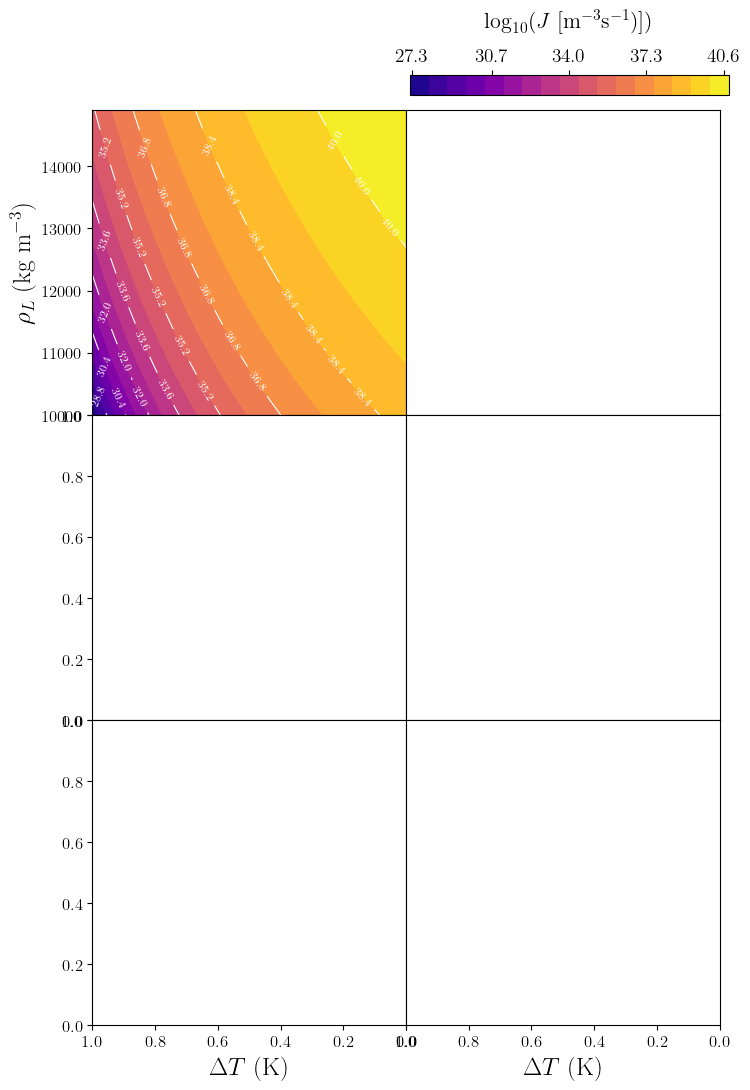

In [ ]:
delta_T = np.linspace(600, 1399, 100)
rho_L_values = np.arange(10000, 15000, 100) 
Delta_T, Rho_L = np.meshgrid(delta_T, rho_L_values)
T = T_m - Delta_T

n = (Rho_L * N_A) / M
delta_mu = (L * Delta_T * Rho_L) / (T_m * M * n)
delta_G_star = (16 * np.pi * gamma**3) / (3 * (n * delta_mu)**2)
N_star = 2 * delta_G_star / delta_mu

J = n * f * np.sqrt(delta_mu / (6 * np.pi * k_B * T * N_star)) * np.exp(-(delta_mu * N_star) / (2 * k_B * T))
log_J = np.log10(J)

# -------------------------------
fig = plt.figure(figsize = (7.5, 10))
gs = gridspec.GridSpec(3, 2, wspace = 0.0, hspace = 0.0)
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

for i in range(3):
    for j in range(2):
        ax = fig.add_subplot(gs[i, j])

        if j == 0:
            if i == 0:
                contour = ax.contourf(-Delta_T, Rho_L, log_J, levels = 20, cmap = 'plasma')
                levels = contour.levels
                highlight_levels = levels[::2]
                contour_lines = ax.contour(-Delta_T, Rho_L, log_J, levels = highlight_levels, colors = 'white', linewidths = 0.8)
                ax.clabel(contour_lines, fmt = '%.1f', colors = 'white', fontsize = 8)

                ax.set_ylabel(r'$\rho_L$ (kg m$^{-3}$)', fontsize = 18)

        ax.invert_xaxis()
        ax.tick_params(labelsize = 12)

        if i == 2:
            ax.set_xlabel(r'$\Delta T$ (K)', fontsize = 18)

        if i != 2:
            ax.set_xticks([])
            ax.set_xticklabels([])

        if j != 0:
            ax.set_yticks([])
            ax.set_yticklabels([])
        
        if i == 0 and j == 1:
            divider = make_axes_locatable(ax)
            cax = plt.axes([0.553, 1., 0.425, 0.02])
            cbar = plt.colorbar(contour, cax = cax, orientation = 'horizontal')
            cbar.ax.set_title(r'$\log_{10}(J \; [$m$^{-3}$s$^{-1})$])', fontsize = 16, pad = 15)
            cbar.ax.tick_params(labelsize = 14, direction = 'out', top = True, labeltop = True, bottom = False, labelbottom = False)
            cbar.ax.yaxis.set_offset_position('left') 
            cbar.ax.yaxis.offsetText.set_fontsize(18)
            cbar.ax.tick_params(labelsize = 14) 
            tick_values = np.linspace(np.nanmin(log_J), np.nanmax(log_J), 5)
            cbar.set_ticks(np.round(tick_values, 1))
            cbar.update_ticks()

plt.tight_layout()
plt.show()

/var/folders/kj/59sk5mrx6214shnd0_nt_2z80000gq/T/ipykernel_15052/671030949.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


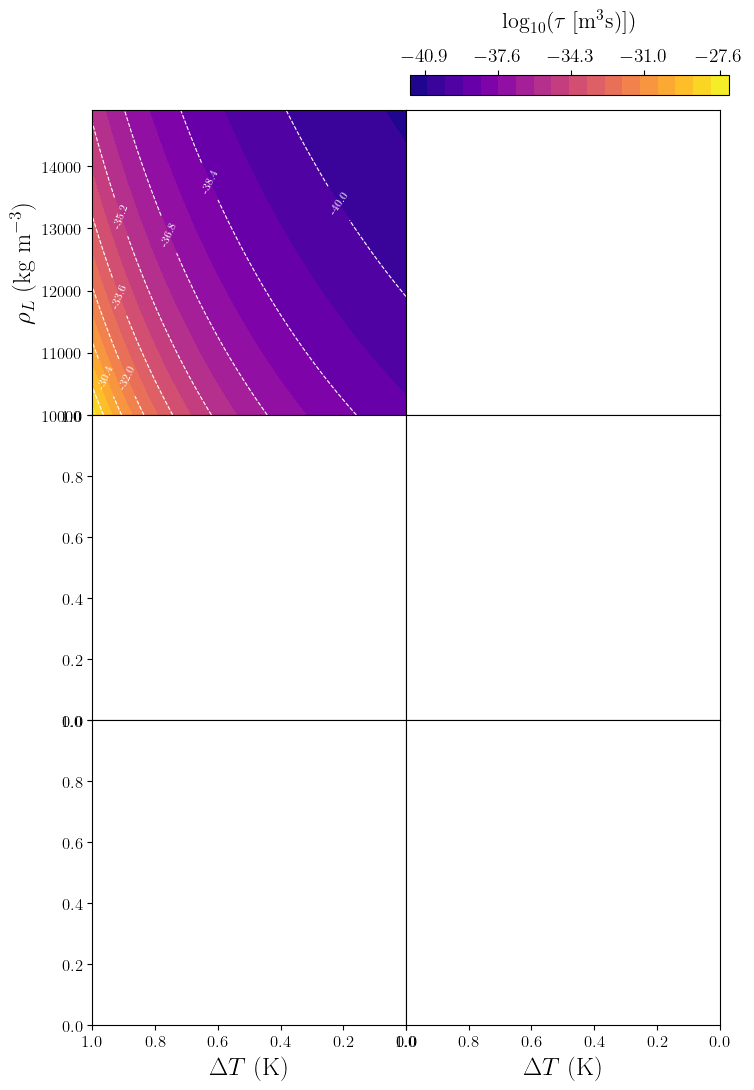

In [302]:
delta_T = np.linspace(600, 1399, 100)
rho_L_values = np.arange(10000, 15000, 100) 
Delta_T, Rho_L = np.meshgrid(delta_T, rho_L_values)
T = T_m - Delta_T

n = (Rho_L * N_A) / M
delta_mu = (L * Delta_T * Rho_L) / (T_m * M * n)
delta_G_star = (16 * np.pi * gamma**3) / (3 * (n * delta_mu)**2)
N_star = 2 * delta_G_star / delta_mu

J = n * f * np.sqrt(delta_mu / (6 * np.pi * k_B * T * N_star)) * np.exp(-(delta_mu * N_star) / (2 * k_B * T))
log_tau = np.log10(1/(2*J))

# -------------------------------
fig = plt.figure(figsize = (7.5, 10))
gs = gridspec.GridSpec(3, 2, wspace = 0.0, hspace = 0.0)
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

for i in range(3):
    for j in range(2):
        ax = fig.add_subplot(gs[i, j])

        if j == 0:
            if i == 0:
                contour = ax.contourf(-Delta_T, Rho_L, log_tau, levels = 20, cmap = 'plasma')
                levels = contour.levels
                highlight_levels = levels[::2]
                contour_lines = ax.contour(-Delta_T, Rho_L, log_tau, levels = highlight_levels, colors = 'white', linewidths = 0.8)
                ax.clabel(contour_lines, fmt = '%.1f', colors = 'white', fontsize = 8)

                ax.set_ylabel(r'$\rho_L$ (kg m$^{-3}$)', fontsize = 18)

        ax.invert_xaxis()
        ax.tick_params(labelsize = 12)

        if i == 2:
            ax.set_xlabel(r'$\Delta T$ (K)', fontsize = 18)

        if i != 2:
            ax.set_xticks([])
            ax.set_xticklabels([])

        if j != 0:
            ax.set_yticks([])
            ax.set_yticklabels([])
        
        if i == 0 and j == 1:
            divider = make_axes_locatable(ax)
            cax = plt.axes([0.553, 1., 0.425, 0.02])
            cbar = plt.colorbar(contour, cax = cax, orientation = 'horizontal')
            cbar.ax.set_title(r'$\log_{10}(\tau \; [$m$^{3}$s)])', fontsize = 16, pad = 15)
            cbar.ax.tick_params(labelsize = 14, direction = 'out', top = True, labeltop = True, bottom = False, labelbottom = False)
            cbar.ax.yaxis.set_offset_position('left') 
            cbar.ax.yaxis.offsetText.set_fontsize(18)
            cbar.ax.tick_params(labelsize = 14) 
            tick_values = np.linspace(np.nanmin(log_tau), np.nanmax(log_tau), 5)
            cbar.set_ticks(np.round(tick_values, 1))
            cbar.update_ticks()

plt.tight_layout()
plt.show()